In [1]:
from music21.note import Note
import seaborn as sns
import matplotlib.pyplot as plt
from annotation_parser import parseAnnotation
from score_parser import parseScore
import pandas as pd
pd.set_option('display.max_rows', 6000)

In [5]:
def getAnnotationOffsets(a):
    annotationIndexes = a[a.isOnset].pitchNames.index.to_list()
    annotationNotes = a[a.isOnset].pitchNames.to_list()
    annotationText = a[a.isOnset].romanNumeral.to_list()
    annotationIndexes.append('end')
    annotationRanges = [(annotationIndexes[i], annotationIndexes[i+1], annotationNotes[i], annotationText[i]) for i in range(len(annotationNotes))]
    return annotationRanges

def getNonChordSequence(annotationRanges, s):
    ret = []
    for start, end, annotationNotes, _ in annotationRanges:
#         print(start, end)
        if end == "end":
            slices = s[start:]
        else:
            slices = s[start:end].iloc[:-1]
        originalNotes = slices.notes.to_list()
        originalNoteNames = [Note(n).name for chord in originalNotes for n in chord]
        nonChordTones = set(originalNoteNames) - set(annotationNotes)
        missingNotes = set(annotationNotes) - set(originalNoteNames)
        originalNonChord = [n for n in originalNoteNames if n in nonChordTones]
        if not originalNotes:
            missingNotesFactor = 1.0
            nonChordToneFactor = 1.0
        else:
            missingNotesRatio = len(missingNotes) / len(set(annotationNotes))
            nonChordToneRatio = len(originalNonChord) / len(originalNoteNames)
#         print('original notes:', originalNoteNames)
#         print('notes implied by annotation:', annotationNotes)
#         print('potential non-chord tones:', originalNonChord)
#         print('missing notes from annotation:', missingNotesFactor)
#         print(start, end, annotationNotes, nonChordToneFactor)
        ret.append((originalNoteNames, nonChordToneRatio, missingNotesRatio))
    return ret

In [6]:
aPath = "AlignedWiR/Corpus/Quartets/Beethoven,_Ludwig_van/Op132/3/analysis.txt"
sPath = "AlignedABC/op132_no15_mov3.mxl"

In [7]:
a = parseAnnotation(aPath)
s = parseScore(sPath)
annotationRanges = getAnnotationOffsets(a)
scoreMetrics = getNonChordSequence(annotationRanges, s)

In [8]:
qualitydfdict = {
    "start": [],
    "end": [],
    "romanNumeral": [],
    "annotationPitchNames": [],
    "scorePitchNames": [],
    "nonChordRatio": [],
    "missingNotesRatio": []
}

for i in range(len(annotationRanges)):
    start, end, annotationPitchNames, romanNumeral = annotationRanges[i]
    scorePitchNames, nonChordRatio, missingNotesRatio = scoreMetrics[i]
    qualitydfdict["start"].append(start)
    qualitydfdict["end"].append(end)
    qualitydfdict["romanNumeral"].append(romanNumeral)
    qualitydfdict["annotationPitchNames"].append(annotationPitchNames)
    qualitydfdict["scorePitchNames"].append(scorePitchNames)
    qualitydfdict["nonChordRatio"].append(nonChordRatio)
    qualitydfdict["missingNotesRatio"].append(missingNotesRatio)

In [10]:
qualitydf = pd.DataFrame(qualitydfdict)

In [11]:
qualitydf

,start,end,romanNumeral,annotationPitchNames,scorePitchNames,nonChordRatio,missingNotesRatio
0,0.00,2.00,IV,"(C, F, A)","[C, C, C, C, A, A, A, A]",0.000000,0.333333
1,2.00,3.00,I,"(C, E, G)","[C, G, C, G, C, G, C, G]",0.000000,0.333333
2,3.00,4.00,IV,"(A, C, F)","[A, C, A, C, A, C, A, C]",0.000000,0.333333
3,4.00,5.00,I,"(C, E, G)","[C, G, E, C, C, G, E, C, C, G, E, C, C, G, E, C]",0.000000,0.000000
4,5.00,6.00,IV,"(A, C, F)","[A, C, F, A, C, F, A, C, F, A, C, F]",0.000000,0.000000
5,6.00,7.00,I,"(C, E, G)","[C, G, E, G, C, G, E, G, C, G, E, G, C, G, E, G]",0.000000,0.000000
6,7.00,8.00,IV,"(A, C, F)","[A, C, C, F, A, C, C, F, A, C, C, F, A, C, C, F]",0.000000,0.000000
7,8.00,10.00,IV,"(F, A, C)","[F, C, A, C, F, F, C, A, C, F, F, C, A, C, F, ...",0.000000,0.000000
8,10.00,12.00,IV,"(A, C, F)","[A, C, C, F, A, C, C, F, A, C, C, F, A, C, C, ...",0.000000,0.000000
9,12.00,14.00,I,"(C, E, G)","[C, G, C, E, C, G, C, E, C, G, C, E, C, G, C, ...",0.000000,0.000000


62.57778255303747 60.0 84.92102852719404


<AxesSubplot:>

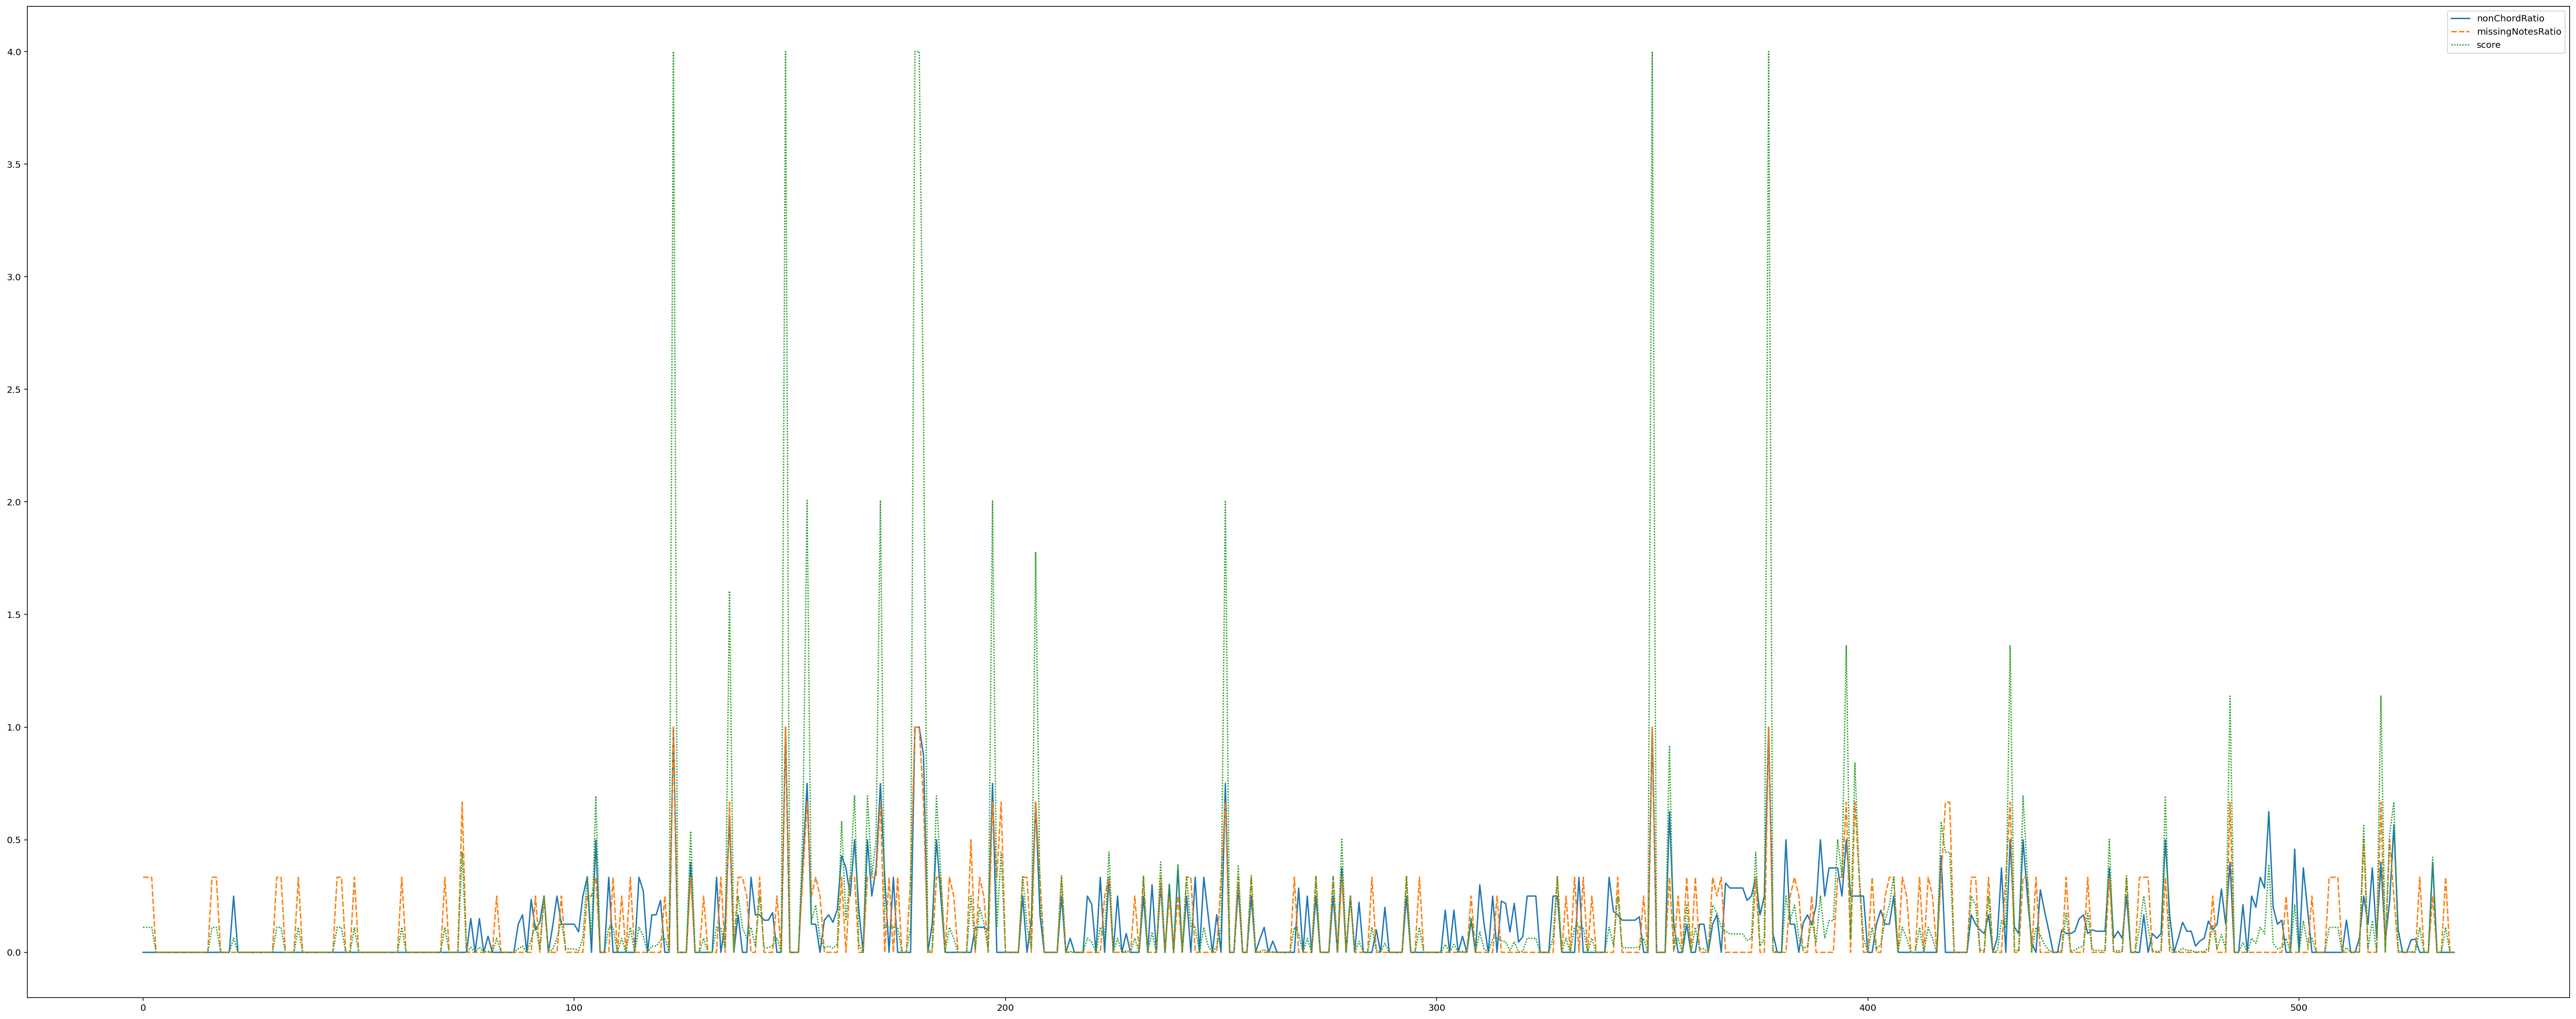

In [44]:
qualitydf["score"] = (qualitydf.nonChordRatio + qualitydf.missingNotesRatio)**2
print(qualitydf.nonChordRatio.sum(), qualitydf.missingNotesRatio.sum(), qualitydf.score.sum())
plt.figure(figsize=(50, 20))
sns.lineplot(data=qualitydf[["nonChordRatio", "missingNotesRatio", "score"]])